In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [252]:
import pandas as pd
data1 = pd.read_csv('/content/gdrive/MyDrive/pattern_kadai2/iris.csv')


m=144,k+1=1,acc=0.96
m=142,k+1=2,acc=0.9466666666666667
m=144,k+1=3,acc=0.96
m=144,k+1=4,acc=0.96
m=145,k+1=5,acc=0.9666666666666667
m=144,k+1=6,acc=0.96
m=145,k+1=7,acc=0.9666666666666667
m=145,k+1=8,acc=0.9666666666666667
m=145,k+1=9,acc=0.9666666666666667
m=145,k+1=10,acc=0.9666666666666667
m=146,k+1=11,acc=0.9733333333333334
m=144,k+1=12,acc=0.96
m=145,k+1=13,acc=0.9666666666666667
m=146,k+1=14,acc=0.9733333333333334
m=146,k+1=15,acc=0.9733333333333334
m=145,k+1=16,acc=0.9666666666666667
m=146,k+1=17,acc=0.9733333333333334
m=146,k+1=18,acc=0.9733333333333334
m=147,k+1=19,acc=0.98
m=147,k+1=20,acc=0.98
m=147,k+1=21,acc=0.98
m=145,k+1=22,acc=0.9666666666666667
m=145,k+1=23,acc=0.9666666666666667
m=145,k+1=24,acc=0.9666666666666667
m=145,k+1=25,acc=0.9666666666666667
m=144,k+1=26,acc=0.96
m=145,k+1=27,acc=0.9666666666666667
m=141,k+1=28,acc=0.94
m=143,k+1=29,acc=0.9533333333333334
m=142,k+1=30,acc=0.9466666666666667
最適なKの値は
[19, 20, 21]


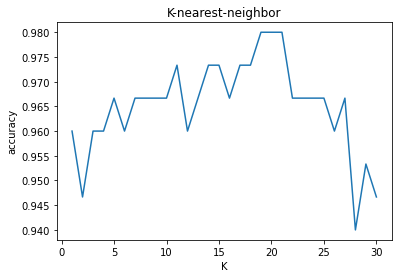

In [251]:
#K_nearest_neighbor 
import numpy as np
data2=data1.to_numpy() #150*5
accuracy=[]
K=[]
for k in range (30):
  m=0 #識別できた数を格納
  for i in range (150):
    test=data2[i,0:4] #data2からi行だけをとりだす 1*4
    data3=np.delete(data2,i,axis=0) #data2からi行を削除 149*5
    data4=data3[:,0:4] #149*4
    
    sq_error=np.square(data4-test) #訓練データとテストデータの誤差の二乗 149*4
    sq_sum=np.sum(sq_error,axis=1) #誤差の二乗和 1*149
    sort=np.argsort(sq_sum,axis=0) #誤差の小さい順にソート、インデックスの配列 1*149

    se=0
    ve=0
    vi=0

    for j in range (k+1):
      if data3[sort[j],4]=='setosa':
        se=se+1
      elif data3[sort[j],4]=='versicolor':
        ve=ve+1
      elif data3[sort[j],4]=='virginica':
        vi=vi+1

    species=['setosa','versicolor','virginica']
    sp=[se,ve,vi]
    id=sp.index(max(sp))
    if species[id]==data2[i,4]:
      m=m+1 #識別できた数をカウント

  acc=m/150.0
  print('m={},k+1={},acc={}'.format(m,k+1,acc))
  accuracy.append(acc)
  K.append(k+1)

#最適なKを求める
optimum_k=[]
j=0
for i in accuracy:
  j+=1
  if i==max(accuracy):
    optimum_k.append(j)

print("最適なKの値は")
print(optimum_k)

#図を表示
import matplotlib.pyplot as plt
plt.figure()
plt.plot(K,accuracy)
plt.title("K-nearest-neighbor")
plt.xlabel("K")
plt.ylabel("accuracy")
plt.show()        

count=1
count=2


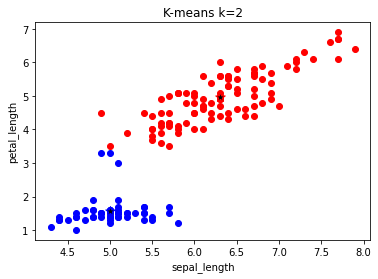

In [131]:
#K_means k=2
import numpy as  np
data5=data1.to_numpy() #150*5
data6=data5[:,0:4] #data5から5列目を削除 150*4

#代表点の初期値を作る
a_k2=np.random.uniform(4,8,(2,1))
b_k2=np.random.uniform(2,5,(2,1))
c_k2=np.random.uniform(1,7,(2,1))
d_k2=np.random.uniform(0,3,(2,1))
ab_k2=np.append(a_k2,b_k2,axis=1)
cd_k2=np.append(c_k2,d_k2,axis=1)
center_k2=np.append(ab_k2,cd_k2,axis=1) #代表点の初期値

center_k2_pre=np.zeros((2,4),dtype=np.float32)
count=0

while np.sum(np.square(center_k2 - center_k2_pre))>0.000000000000000000000000000001:
  count+=1
  print('count={}'.format(count))
  center_k2_pre=center_k2.copy()  #ループの更新前のcenter_k2を保持 値渡し
  #print( center_k2_pre)

  compare_k2=[] #代表点との距離の二乗和を格納する配列
  for i in range (2):
    sq_error_k2=np.square(data6-center_k2[i,:])
    sq_sum_k2=np.sum(sq_error_k2,axis=1)
    compare_k2.append(sq_sum_k2)

  compare_k2=np.array(compare_k2) #2*150
  sort_k2=np.argsort(compare_k2,axis=0)

  c0=[]
  c1=[]
  data_c0=[]  
  data_c1=[]

  for i in range (150):
    if sort_k2[0,i]==0:     #クラス0に近い場合
      c0.append(i)          #クラス0に近いデータのインデックスをc0に格納
    elif sort_k2[1,i]==0:   #クラス1に近い場合
      c1.append(i)          #クラス1に近いデータのインデックスをc1に格納


  for i in c0:
    data_c0.append(data6[i,:])   #クラス0の特徴量を格納

  for i in c1:
    data_c1.append(data6[i,:])   #クラス1の特徴量を格納

  data_c0=np.array(data_c0)
  data_c1=np.array(data_c1)
  
  #中心点を更新
  center_k2[0,:]=np.mean(data_c0,axis=0)
  center_k2[1,:]=np.mean(data_c1,axis=0)
  
#図のデータを用意
x_c0=[]
y_c0=[]
for i in c0:
  x_c0.append(data6[i,0])
  y_c0.append(data6[i,2])

x_c1=[]
y_c1=[]

for i in c1:
  x_c1.append(data6[i,0])
  y_c1.append(data6[i,2])

x_center_c0=center_k2[0,0]
y_center_c0=center_k2[0,2]
x_center_c1=center_k2[1,0]
y_center_c1=center_k2[1,2]

#図を表示
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x_c0,y_c0,c="red")
plt.scatter(x_center_c0,y_center_c0,s=100,c="black",marker="*",edgecolors="red")
plt.scatter(x_c1,y_c1,c="blue")
plt.scatter(x_center_c1,y_center_c1,s=100,c="black",marker="*",edgecolors="blue")
plt.title("K-means k=2")
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.show()

count=1
count=2
count=3


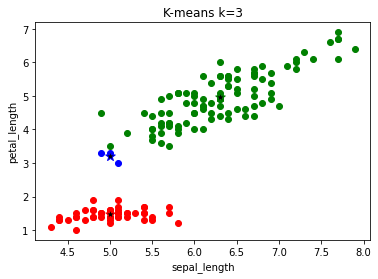

In [130]:
#K_means k=3
import numpy as  np
data5=data1.to_numpy() #150*5
data6=data5[:,0:4] #data5から5列目を削除 150*4

#代表点の初期値を作る
a_k3=np.random.uniform(4,8,(3,1))
b_k3=np.random.uniform(2,5,(3,1))
c_k3=np.random.uniform(1,7,(3,1))
d_k3=np.random.uniform(0,3,(3,1))
ab_k3=np.append(a_k3,b_k3,axis=1)
cd_k3=np.append(c_k3,d_k3,axis=1)
center_k3=np.append(ab_k3,cd_k3,axis=1) #代表点の初期値

center_k3_pre=np.zeros((3,4),dtype=np.float32)
count=0

while np.sum(np.square(center_k3 - center_k3_pre))>0.00001:
  count+=1
  print('count={}'.format(count))
  center_k3_pre=center_k3.copy()  #ループの更新前のcenter_k3を保持 値渡し

  compare_k3=[] #代表点との距離の二乗和を格納する配列
  for i in range (3):
    sq_error_k3=np.square(data6-center_k3[i,:])
    sq_sum_k3=np.sum(sq_error_k3,axis=1)
    compare_k3.append(sq_sum_k3)


  compare_k3=np.array(compare_k3) #3*150
  sort_k3=np.argsort(compare_k3,axis=0)

  c0=[]
  c1=[]
  c2=[]
  data_c0=[]  
  data_c1=[]
  data_c2=[]

  for i in range (150):
    if sort_k3[0,i]==0:    #クラス0に近い場合
      c0.append(i)         #クラス0に近いデータのインデックスをc0に格納
    elif sort_k3[1,i]==0:  #クラス1に近い場合
      c1.append(i)         #クラス1に近いデータのインデックスをc1に格納
    elif sort_k3[2,i]==0:  #クラス2に近い場合
      c2.append(i)         #クラス2に近いデータのインデックスをc2に格納


  for i in c0:
    data_c0.append(data6[i,:])   #クラス0の特徴量を格納

  for i in c1:
    data_c1.append(data6[i,:])   #クラス1の特徴量を格納

  for i in c2:
    data_c2.append(data6[i,:])   #クラス2の特徴量を格納

  data_c0=np.array(data_c0)
  data_c1=np.array(data_c1)
  data_c2=np.array(data_c2)
  
  #中心点を更新
  center_k3[0,:]=np.mean(data_c0,axis=0)
  center_k3[1,:]=np.mean(data_c1,axis=0)
  center_k3[2,:]=np.mean(data_c2,axis=0)
  
#図のデータを用意
x_c0=[]
y_c0=[]
for i in c0:
  x_c0.append(data6[i,0])
  y_c0.append(data6[i,2])

x_c1=[]
y_c1=[]

for i in c1:
  x_c1.append(data6[i,0])
  y_c1.append(data6[i,2])

x_c2=[]
y_c2=[]

for i in c2:
  x_c2.append(data6[i,0])
  y_c2.append(data6[i,2])

x_center_c0=center_k3[0,0]
y_center_c0=center_k3[0,2]
x_center_c1=center_k3[1,0]
y_center_c1=center_k3[1,2]
x_center_c2=center_k3[2,0]
y_center_c2=center_k3[2,2]

#図を表示
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x_c0,y_c0,c="red")
plt.scatter(x_center_c0,y_center_c0,s=100,c="black",marker="*",edgecolors="red")
plt.scatter(x_c1,y_c1,c="blue")
plt.scatter(x_center_c1,y_center_c1,s=100,c="black",marker="*",edgecolors="blue")
plt.scatter(x_c2,y_c2,c="green")
plt.scatter(x_center_c2,y_center_c2,s=100,c="black",marker="*",edgecolors="green")
plt.title("K-means k=3")
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.show()

count=1
count=2
count=3
count=4
count=5
count=6
count=7
count=8
count=9
count=10
count=11
count=12
count=13
count=14
count=15
count=16
count=17
count=18
count=19


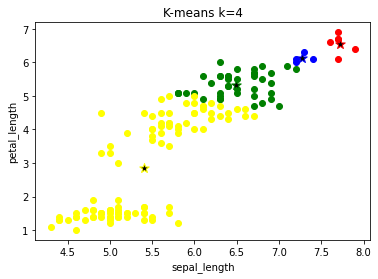

In [129]:
#K_means k=4
import numpy as  np
data5=data1.to_numpy() #150*5
data6=data5[:,0:4] #data5から5列目を削除 150*4

#代表点の初期値を作る
a_k4=np.random.uniform(4,8,(4,1))
b_k4=np.random.uniform(2,5,(4,1))
c_k4=np.random.uniform(1,7,(4,1))
d_k4=np.random.uniform(0,3,(4,1))
ab_k4=np.append(a_k4,b_k4,axis=1)
cd_k4=np.append(c_k4,d_k4,axis=1)
center_k4=np.append(ab_k4,cd_k4,axis=1) #代表点の初期値

center_k4_pre=np.zeros((4,4),dtype=np.float32)
count=0

while np.sum(np.square(center_k4 - center_k4_pre))>0.0001:
  count+=1
  print('count={}'.format(count))
  center_k4_pre=center_k4.copy()  #ループの更新前のcenter_k4を保持 値渡し

  compare_k4=[] #代表点との距離の二乗和を格納する配列
  for i in range (4):
    sq_error_k4=np.square(data6-center_k4[i,:])
    sq_sum_k4=np.sum(sq_error_k4,axis=1)
    compare_k4.append(sq_sum_k4)


  compare_k4=np.array(compare_k4) #4*150
  sort_k4=np.argsort(compare_k4,axis=0)

  c0=[]
  c1=[]
  c2=[]
  c3=[]
  data_c0=[]  
  data_c1=[]
  data_c2=[]
  data_c3=[]

  for i in range (150):
    if sort_k4[0,i]==0:    #クラス0に近い場合
      c0.append(i)         #クラス0に近いデータのインデックスをc0に格納
    elif sort_k4[1,i]==0:  #クラス1に近い場合
      c1.append(i)         #クラス1に近いデータのインデックスをc1に格納
    elif sort_k4[2,i]==0:  #クラス2に近い場合
      c2.append(i)         #クラス2に近いデータのインデックスをc2に格納
    elif sort_k4[3,i]==0:  #クラス3に近い場合
      c3.append(i)         #クラス3に近いデータのインデックスをc3に格納


  for i in c0:
    data_c0.append(data6[i,:])   #クラス0の特徴量を格納

  for i in c1:
    data_c1.append(data6[i,:])   #クラス1の特徴量を格納

  for i in c2:
    data_c2.append(data6[i,:])   #クラス2の特徴量を格納
  
  for i in c3:
    data_c3.append(data6[i,:])   #クラス3の特徴量を格納

  data_c0=np.array(data_c0)
  data_c1=np.array(data_c1)
  data_c2=np.array(data_c2)
  data_c3=np.array(data_c3)
  
  #中心点を更新
  center_k4[0,:]=np.mean(data_c0,axis=0)
  center_k4[1,:]=np.mean(data_c1,axis=0)
  center_k4[2,:]=np.mean(data_c2,axis=0)
  center_k4[3,:]=np.mean(data_c3,axis=0)
  
#図のデータを用意
x_c0=[]
y_c0=[]
for i in c0:
  x_c0.append(data6[i,0])
  y_c0.append(data6[i,2])

x_c1=[]
y_c1=[]

for i in c1:
  x_c1.append(data6[i,0])
  y_c1.append(data6[i,2])

x_c2=[]
y_c2=[]

for i in c2:
  x_c2.append(data6[i,0])
  y_c2.append(data6[i,2])

x_c3=[]
y_c3=[]

for i in c3:
  x_c3.append(data6[i,0])
  y_c3.append(data6[i,2])

x_center_c0=center_k4[0,0]
y_center_c0=center_k4[0,2]
x_center_c1=center_k4[1,0]
y_center_c1=center_k4[1,2]
x_center_c2=center_k4[2,0]
y_center_c2=center_k4[2,2]
x_center_c3=center_k4[3,0]
y_center_c3=center_k4[3,2]

#図を表示
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x_c0,y_c0,c="red")
plt.scatter(x_center_c0,y_center_c0,s=100,c="black",marker="*",edgecolors="red")
plt.scatter(x_c1,y_c1,c="blue")
plt.scatter(x_center_c1,y_center_c1,s=100,c="black",marker="*",edgecolors="blue")
plt.scatter(x_c2,y_c2,c="green")
plt.scatter(x_center_c2,y_center_c2,s=100,c="black",marker="*",edgecolors="green")
plt.scatter(x_c3,y_c3,c="yellow")
plt.scatter(x_center_c3,y_center_c3,s=100,c="black",marker="*",edgecolors="yellow")
plt.title("K-means k=4")
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.show()

count=1
count=2


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


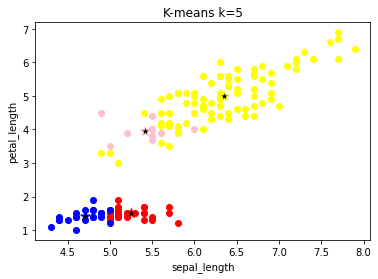

In [128]:
#K_means k=5
import numpy as  np
data5=data1.to_numpy() #150*5
data6=data5[:,0:4] #data5から5列目を削除 150*4

#代表点の初期値を作る
a_k5=np.random.uniform(4,8,(5,1))
b_k5=np.random.uniform(2,5,(5,1))
c_k5=np.random.uniform(1,7,(5,1))
d_k5=np.random.uniform(0,3,(5,1))
ab_k5=np.append(a_k5,b_k5,axis=1)
cd_k5=np.append(c_k5,d_k5,axis=1)
center_k5=np.append(ab_k5,cd_k5,axis=1) #代表点の初期値

center_k5_pre=np.zeros((5,4),dtype=np.float32)
count=0

while np.sum(np.square(center_k5 - center_k5_pre))>0.0000001:
  count+=1
  print('count={}'.format(count))
  center_k5_pre=center_k5.copy()  #ループの更新前のcenter_k5を保持 値渡し

  compare_k5=[] #代表点との距離の二乗和を格納する配列
  for i in range (5):
    sq_error_k5=np.square(data6-center_k5[i,:])
    sq_sum_k5=np.sum(sq_error_k5,axis=1)
    compare_k5.append(sq_sum_k5)


  compare_k5=np.array(compare_k5) #4*150
  sort_k5=np.argsort(compare_k5,axis=0)

  c0=[]
  c1=[]
  c2=[]
  c3=[]
  c4=[]
  data_c0=[]  
  data_c1=[]
  data_c2=[]
  data_c3=[]
  data_c4=[]

  for i in range (150):
    if sort_k5[0,i]==0:    #クラス0に近い場合
      c0.append(i)         #クラス0に近いデータのインデックスをc0に格納
    elif sort_k5[1,i]==0:  #クラス1に近い場合
      c1.append(i)         #クラス1に近いデータのインデックスをc1に格納
    elif sort_k5[2,i]==0:  #クラス2に近い場合
      c2.append(i)         #クラス2に近いデータのインデックスをc2に格納
    elif sort_k5[3,i]==0:  #クラス3に近い場合
      c3.append(i)         #クラス3に近いデータのインデックスをc3に格納
    elif sort_k5[4,i]==0:  #クラス4に近い場合
      c4.append(i)         #クラス4に近いデータのインデックスをc4に格納


  for i in c0:
    data_c0.append(data6[i,:])   #クラス0の特徴量を格納

  for i in c1:
    data_c1.append(data6[i,:])   #クラス1の特徴量を格納

  for i in c2:
    data_c2.append(data6[i,:])   #クラス2の特徴量を格納
  
  for i in c3:
    data_c3.append(data6[i,:])   #クラス3の特徴量を格納
  
  for i in c4:
    data_c4.append(data6[i,:])   #クラス3の特徴量を格納

  data_c0=np.array(data_c0)
  data_c1=np.array(data_c1)
  data_c2=np.array(data_c2)
  data_c3=np.array(data_c3)
  data_c4=np.array(data_c4)
  
  #中心点を更新
  center_k5[0,:]=np.mean(data_c0,axis=0)
  center_k5[1,:]=np.mean(data_c1,axis=0)
  center_k5[2,:]=np.mean(data_c2,axis=0)
  center_k5[3,:]=np.mean(data_c3,axis=0)
  center_k5[4,:]=np.mean(data_c4,axis=0)
  
#図のデータを用意
x_c0=[]
y_c0=[]
for i in c0:
  x_c0.append(data6[i,0])
  y_c0.append(data6[i,2])

x_c1=[]
y_c1=[]

for i in c1:
  x_c1.append(data6[i,0])
  y_c1.append(data6[i,2])

x_c2=[]
y_c2=[]

for i in c2:
  x_c2.append(data6[i,0])
  y_c2.append(data6[i,2])

x_c3=[]
y_c3=[]

for i in c3:
  x_c3.append(data6[i,0])
  y_c3.append(data6[i,2])

x_c4=[]
y_c4=[]

for i in c4:
  x_c4.append(data6[i,0])
  y_c4.append(data6[i,2])

x_center_c0=center_k5[0,0]
y_center_c0=center_k5[0,2]
x_center_c1=center_k5[1,0]
y_center_c1=center_k5[1,2]
x_center_c2=center_k5[2,0]
y_center_c2=center_k5[2,2]
x_center_c3=center_k5[3,0]
y_center_c3=center_k5[3,2]
x_center_c4=center_k5[4,0]
y_center_c4=center_k5[4,2]

#図を表示
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x_c0,y_c0,c="red")
plt.scatter(x_center_c0,y_center_c0,s=100,c="black",marker="*",edgecolors="red")
plt.scatter(x_c1,y_c1,c="blue")
plt.scatter(x_center_c1,y_center_c1,s=100,c="black",marker="*",edgecolors="blue")
plt.scatter(x_c2,y_c2,c="green")
plt.scatter(x_center_c2,y_center_c2,s=100,c="black",marker="*",edgecolors="green")
plt.scatter(x_c3,y_c3,c="yellow")
plt.scatter(x_center_c3,y_center_c3,s=100,c="black",marker="*",edgecolors="yellow")
plt.scatter(x_c4,y_c4,c="pink")
plt.scatter(x_center_c4,y_center_c4,s=100,c="black",marker="*",edgecolors="pink")
plt.title("K-means k=5")
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.show()

In [34]:
data7 = pd.read_csv('/content/gdrive/MyDrive/pattern_kadai2/auto-mpg.csv')
data8=data7.drop([32,126,330,336,354,374]) #horsepowerの値が?となっている行を削除

horsepower,weightからmpgを予測するモデル
loss_hw=1983.3757279587837
displacement,horsepower,weight,accelerationからmpgを予測するモデル
loss_all=591.850523853167


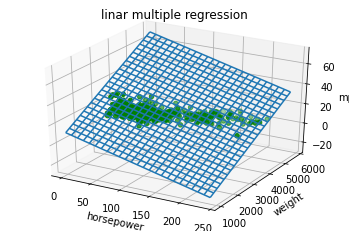

In [250]:
#線形重回帰
import numpy as np
data9=data8.to_numpy() #392*9
train_data=data9[0:382,:] #訓練データ 382*9　テストデータとして10個残しておく。
test_data=data9[382:392,:] #テストデータ 10*9
horsepower=np.array([float(i) for i in data9[:,3]]) #horsepowerがstr型になっているのでfloat型に変換して行列にした

#訓練データ 382個
mpg_train=data9[0:382,0]
displacement_train=data9[0:382,2]
horsepower_train=horsepower[0:382]
weight_train=data9[0:382,4]
acceleration_train=data9[0:382,5]

#テストデータ 10個
mpg_test=data9[382:392,0]
displacement_test=data9[382:392,2]
horsepower_test=horsepower[382:392]
weight_test=data9[382:392,4]
acceleration_test=data9[382:392,5]

#重みベクトルを求める
X_hw=[] 
X_hw.append(horsepower_train)
X_hw.append(weight_train)
X_hw=np.array(X_hw,dtype=float) #horsepowerとweightの行列 2*382
XTX_hw=np.dot(X_hw,X_hw.T) 
XTX_hw_inv=np.linalg.inv(XTX_hw) 
XTXinvXT_hw=np.dot(XTX_hw_inv,X_hw)
w_hw=np.dot(XTXinvXT_hw,mpg_train) #ムーアペンローズの疑似逆行列より

#重み行列(w_hw)を用いた予測値とテストデータの正解との差を考える
test_hw=[]
test_hw.append(horsepower_test)
test_hw.append(weight_test)
test_hw=np.array(test_hw)
y_hw=np.dot(test_hw.T,w_hw)
loss_hw=np.sum(np.square(y_hw-mpg_test),axis=0)
print("horsepower,weightからmpgを予測するモデル")
print('loss_hw={}'.format(loss_hw))

import matplotlib.pyplot as plt
fig=plt.figure()

#displacement,horsepower,weight,accelerationからmpgを予測するモデル
X_all=[] 
X_all.append(displacement_train)
X_all.append(horsepower_train)
X_all.append(weight_train)
X_all.append(acceleration_train)
X_all=np.array(X_all,dtype=float) #displacement,horsepower,weight,accelerationの行列 4*382
XTX_all=np.dot(X_all,X_all.T) 
XTX_all_inv=np.linalg.inv(XTX_all) 
XTXinvXT_all=np.dot(XTX_all_inv,X_all)
w_all=np.dot(XTXinvXT_all,mpg_train) #ムーアペンローズの疑似逆行列より

#重み行列(w_all)を用いた予測値とテストデータの正解との差を考える
test_all=[]
test_all.append(displacement_test)
test_all.append(horsepower_test)
test_all.append(weight_test)
test_all.append(acceleration_test)
test_all=np.array(test_all)
y_all=np.dot(test_all.T,w_all)
loss_all=np.sum(np.square(y_all-mpg_test),axis=0)
print("displacement,horsepower,weight,accelerationからmpgを予測するモデル")
print('loss_all={}'.format(loss_all))


#三次元平面
ax = fig.add_subplot(projection='3d')
x=np.arange(0, 250, 10)
y=np.arange(1000, 6000, 200)
X,Y= np.meshgrid(x, y)
Z=X*w_hw[0]+Y*w_hw[1]
plt.title("linar multiple regression")
ax.set_xlabel("horsepower")
ax.set_ylabel("weight")
ax.set_zlabel("mpg")
ax.plot_wireframe(X,Y,Z)

#散布図
mpg=data9[:,0]
mpg_list=mpg.tolist()
weight=data9[:,4]
mpg_list=mpg.tolist()
horsepower_list=horsepower.tolist()
weight_list=weight.tolist()
ax.scatter(horsepower_list,weight_list,mpg_list,color='green')
plt.show()    

